#### Importing The Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [46]:
df= pd.read_excel(r"C:\Users\udayk\Downloads\Sample_-_Superstore.xls")

In [47]:
df.columns = df.columns.str.replace(" ","")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("-","")

In [48]:
df.columns 

Index(['rowid', 'orderid', 'orderdate', 'shipdate', 'shipmode', 'customerid',
       'customername', 'segment', 'country', 'city', 'state', 'postalcode',
       'region', 'productid', 'category', 'subcategory', 'productname',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [50]:
df.drop("rowid",axis=1,inplace=True)
df.drop("orderid",axis=1,inplace=True)

In [143]:
df.head(3)

,orderdate,shipdate,shipmode,customerid,customername,segment,country,city,state,postalcode,region,productid,category,subcategory,productname,sales,quantity,discount,profit
0,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


#### Missing values

In [51]:
df.isna().sum()

orderdate       0
shipdate        0
shipmode        0
customerid      0
customername    0
segment         0
country         0
city            0
state           0
postalcode      0
region          0
productid       0
category        0
subcategory     0
productname     0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

#### Duplicated values

In [52]:
df[df.duplicated()]

,orderdate,shipdate,shipmode,customerid,customername,segment,country,city,state,postalcode,region,productid,category,subcategory,productname,sales,quantity,discount,profit
3406,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df[df.duplicated()]

,orderdate,shipdate,shipmode,customerid,customername,segment,country,city,state,postalcode,region,productid,category,subcategory,productname,sales,quantity,discount,profit


#### Checking for Structural Errors

In [8]:
for i in df.columns:
    print(f"{i} = {df[i].unique()}")
    print()

rowid = [   1    2    3 ... 9992 9993 9994]

orderid = ['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']

orderdate = <DatetimeArray>
['2016-11-08 00:00:00', '2016-06-12 00:00:00', '2015-10-11 00:00:00',
 '2014-06-09 00:00:00', '2017-04-15 00:00:00', '2016-12-05 00:00:00',
 '2015-11-22 00:00:00', '2014-11-11 00:00:00', '2014-05-13 00:00:00',
 '2014-08-27 00:00:00',
 ...
 '2016-10-11 00:00:00', '2014-06-18 00:00:00', '2017-02-28 00:00:00',
 '2015-05-09 00:00:00', '2014-11-06 00:00:00', '2015-12-29 00:00:00',
 '2014-04-03 00:00:00', '2016-06-03 00:00:00', '2015-04-12 00:00:00',
 '2014-01-21 00:00:00']
Length: 1237, dtype: datetime64[ns]

shipdate = <DatetimeArray>
['2016-11-11 00:00:00', '2016-06-16 00:00:00', '2015-10-18 00:00:00',
 '2014-06-14 00:00:00', '2017-04-20 00:00:00', '2016-12-10 00:00:00',
 '2015-11-26 00:00:00', '2014-11-18 00:00:00', '2014-05-15 00:00:00',
 '2014-09-01 00:00:00',
 ...
 '2017-04-06 00:00:00', '2015-0

In [9]:
df.dtypes

rowid                    int64
orderid                 object
orderdate       datetime64[ns]
shipdate        datetime64[ns]
shipmode                object
customerid              object
customername            object
segment                 object
country                 object
city                    object
state                   object
postalcode               int64
region                  object
productid               object
category                object
subcategory             object
productname             object
sales                  float64
quantity                 int64
discount               float64
profit                 float64
dtype: object

### Univariate Analysis for Numerical columns

* H-histogram
* B-Boxplot
* D-Density

Histogram

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

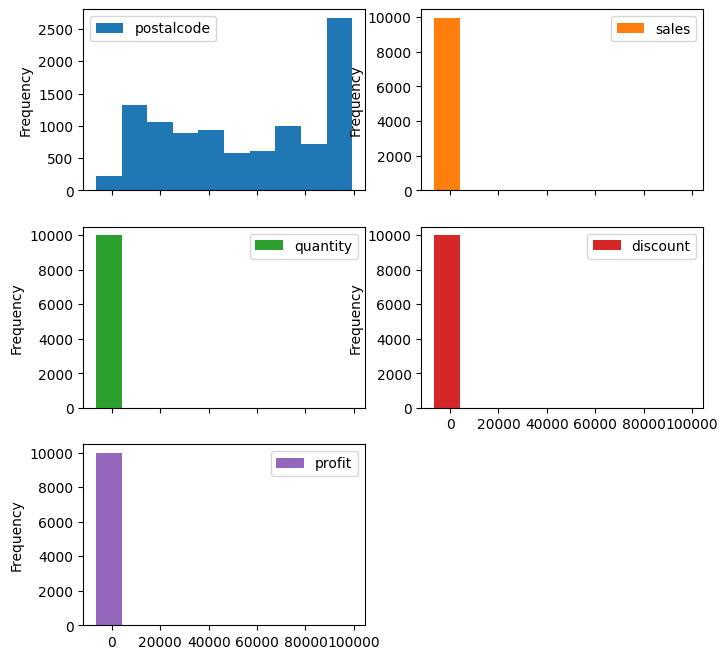

In [75]:
df.plot(kind="hist",subplots=True,layout= (3,2),figsize=(8,8))

Boxplot

postalcode       Axes(0.125,0.653529;0.352273x0.226471)
sales         Axes(0.547727,0.653529;0.352273x0.226471)
quantity         Axes(0.125,0.381765;0.352273x0.226471)
discount      Axes(0.547727,0.381765;0.352273x0.226471)
profit               Axes(0.125,0.11;0.352273x0.226471)
dtype: object

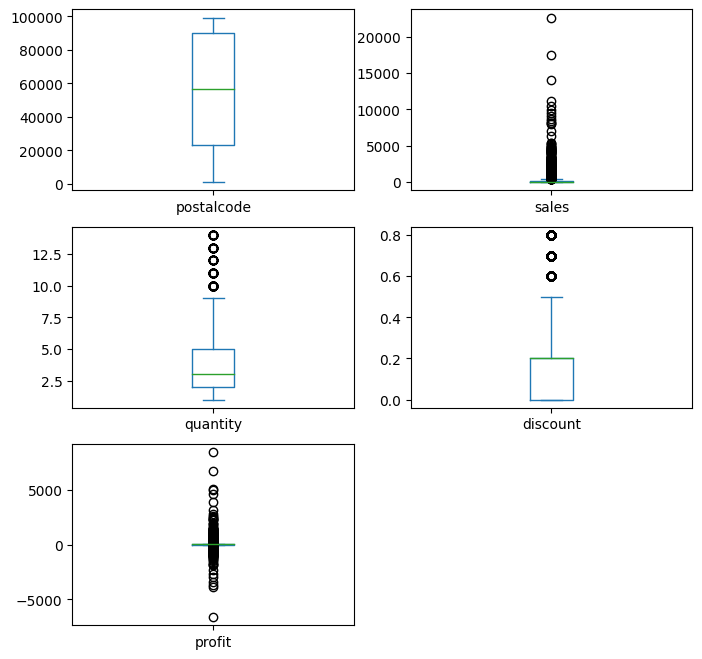

In [57]:
df.plot(kind="box",subplots=True,layout= (3,2),figsize=(8,8))

conclusion:

1. From boxplot representation,sales,quantity,discount,profit are having the outliers but they can't be replaced.
2. Because the data is crucial for the analysis.

KDE / Density plot

<Axes: ylabel='Density'>

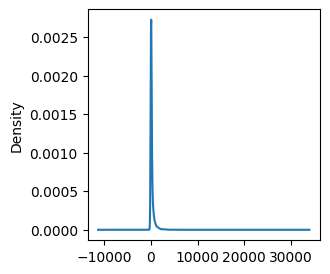

In [107]:
df["sales"].plot(kind="kde",figsize=(3,3))

<Axes: ylabel='Density'>

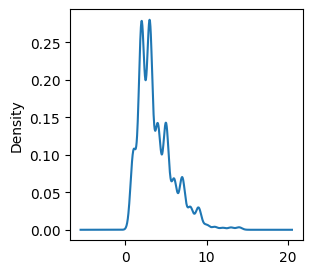

In [111]:
df["quantity"].plot(kind="kde",figsize=(3,3))

<Axes: ylabel='Density'>

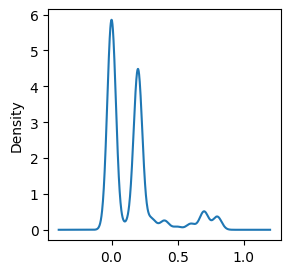

In [110]:
df["discount"].plot(kind="kde",figsize=(3,3))

<Axes: ylabel='Density'>

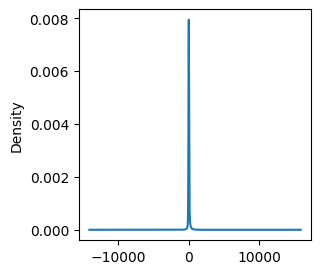

In [109]:
df["profit"].plot(kind="kde",figsize=(3,3))

<Axes: ylabel='Density'>

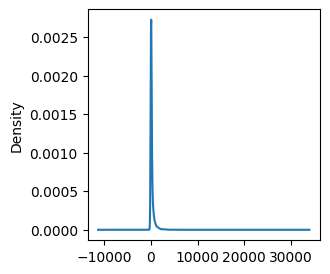

In [108]:
df["sales"].plot(kind="kde",figsize=(3,3))

### Univariate Analysis for categorical columns

* C-Countplot
* B- Barchart
* P- Piechart

In [114]:
obj = df.select_dtypes(include="object")
obj.columns

Index(['shipmode', 'customerid', 'customername', 'segment', 'country', 'city',
       'state', 'region', 'productid', 'category', 'subcategory',
       'productname'],
      dtype='object')

Bar Chart

<Axes: xlabel='shipmode'>

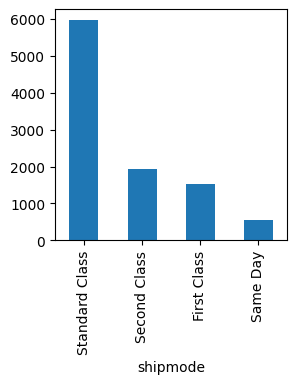

In [132]:
df["shipmode"].value_counts().plot(kind="bar",figsize=(3,3))

<Axes: xlabel='segment'>

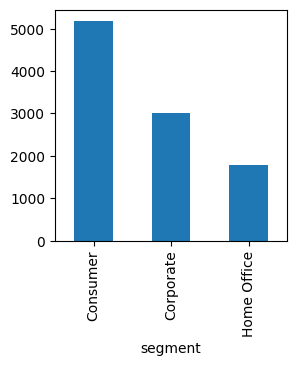

In [133]:
df["segment"].value_counts().plot(kind="bar",figsize=(3,3))

<Axes: xlabel='region'>

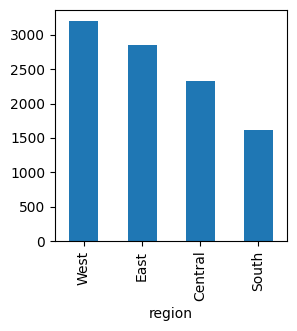

In [134]:
df["region"].value_counts().plot(kind="bar",figsize=(3,3))

<Axes: xlabel='category'>

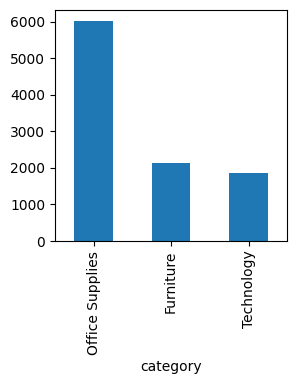

In [135]:
df["category"].value_counts().plot(kind="bar",figsize=(3,3))

Count Plot

<Axes: xlabel='shipmode', ylabel='count'>

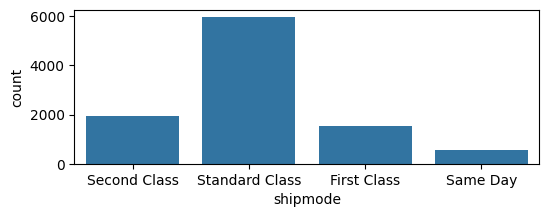

In [198]:
plt.figure(figsize=(6,2))
sns.countplot(data= df,x= "shipmode")

<Axes: xlabel='segment', ylabel='count'>

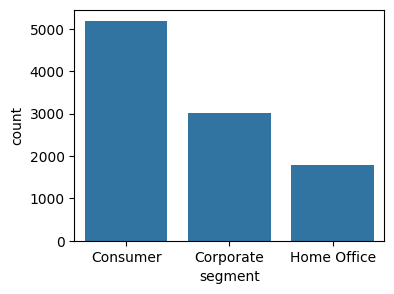

In [122]:
plt.figure(figsize=(4,3))
sns.countplot(data= df,x= "segment")

<Axes: xlabel='region', ylabel='count'>

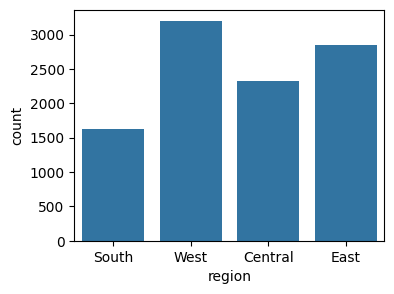

In [126]:
plt.figure(figsize=(4,3))
sns.countplot(data= df,x= "region")

<Axes: xlabel='category', ylabel='count'>

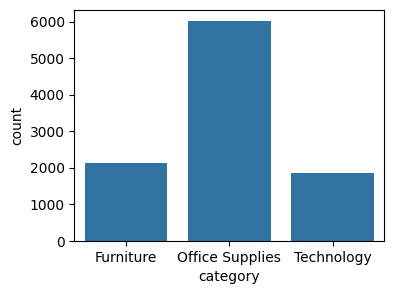

In [127]:
plt.figure(figsize=(4,3))
sns.countplot(data= df,x= "category")

Pie Chart

<Axes: ylabel='count'>

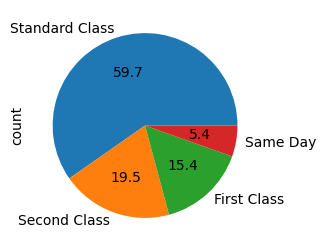

In [139]:
(df["shipmode"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

<Axes: ylabel='count'>

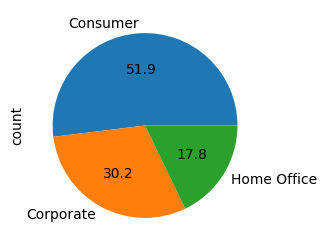

In [140]:
(df["segment"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

<Axes: ylabel='count'>

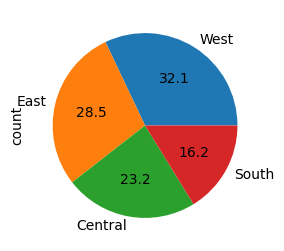

In [141]:
(df["region"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

<Axes: ylabel='count'>

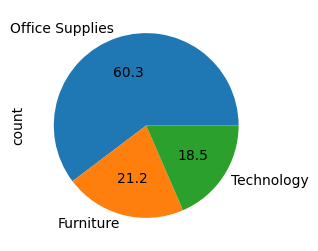

In [142]:
(df["category"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

### Bivariate Analysis
1. Categorical vs categorical
* crosstab,stacked/group bar,count plot

2. Categorical vs Numerical
* Line plot,groupby,pivot table,Bar chart

3. Numerical vs Numerical
* scatter plot,correlation

#### 1. Categorcal vs Categorcal

crosstab

In [148]:
pd.crosstab(df["country"],df["segment"])

segment,Consumer,Corporate,Home Office
country,,,
United States,5191,3020,1782


conclusion:
1. In US,5191 products are ordered by the consumers from store which is the highest compare to other segment.
2. In second place,3020 products are ordered by customers for corporate and followed by 1782 products are ordered for Home office.

In [159]:
pd.crosstab(df["shipmode"],df["category"])

category,Furniture,Office Supplies,Technology
shipmode,,,
First Class,327,910,301
Same Day,119,326,98
Second Class,427,1152,366
Standard Class,1247,3638,1082


conclusion:
1. For all types of categories,the standard class is first preferred as shipmode.
2. followed by standard class, second class,first class and same day are preferred

countplot

<Axes: xlabel='country', ylabel='count'>

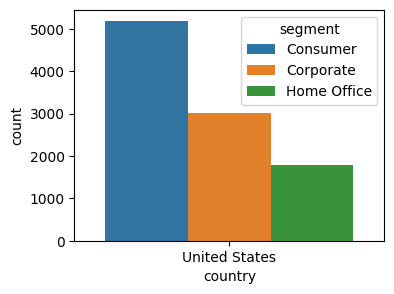

In [180]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x="country",hue="segment")

<Axes: xlabel='shipmode', ylabel='count'>

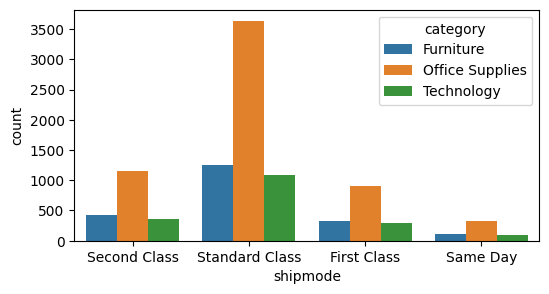

In [178]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x="shipmode",hue="category")

#### 2. Categorical vs Numerical

Line plot

<Axes: xlabel='orderdate'>

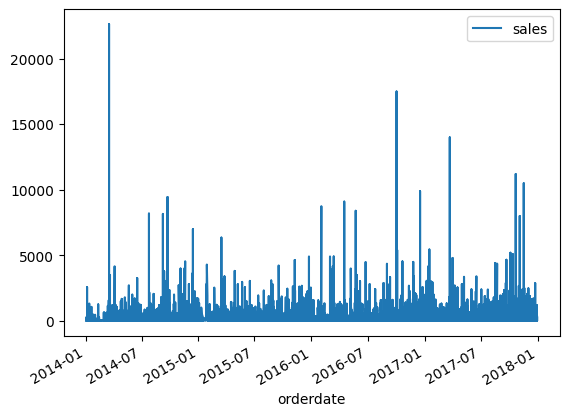

In [207]:
df.plot(kind="line",x="orderdate",y="sales")

conclusion:
1. on 2014-03-18,the highest sales are recorded around 22500.

<Axes: xlabel='orderdate'>

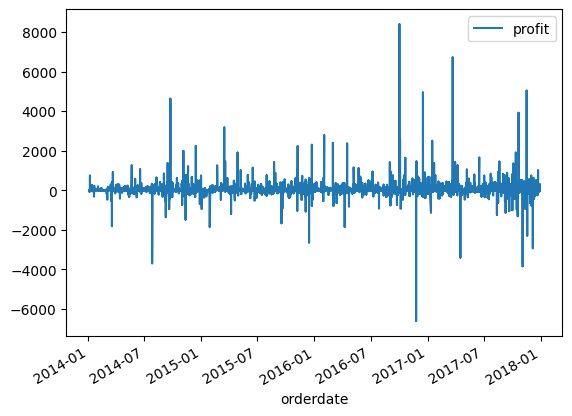

In [189]:
df.plot(kind="line",x="orderdate",y="profit")

conclusion:
1. on 2016-11-25 recorded the highest loss to the store of 6599.9 USD.
2. on 2016-10-02 recorded the highest profit to the store of 8399.97 USD.

#### 3. Numerical vs Numerical

In [213]:
df.corr(numeric_only=True)

,postalcode,sales,quantity,discount,profit
postalcode,1.000000,-0.023851,0.012731,0.058471,-0.029968
sales,-0.023851,1.000000,0.200808,-0.028197,0.479067
quantity,0.012731,0.200808,1.000000,0.008680,0.066241
discount,0.058471,-0.028197,0.008680,1.000000,-0.219481
profit,-0.029968,0.479067,0.066241,-0.219481,1.000000


conclusion:
1. From the correlaton,profit and discount both are in negative weak correlation if discount increases profit decreases with respectively and vice-versa.
2. sales and profit both are in positive moderate correlation if sales increases profit also increases.

<Axes: xlabel='discount', ylabel='profit'>

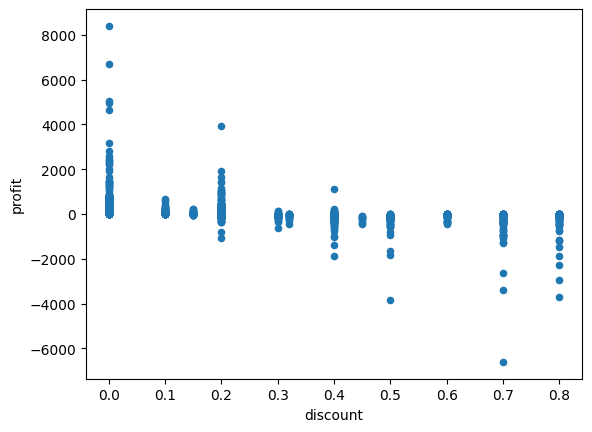

In [215]:
df.plot(kind="scatter",x= "discount",y="profit")

conclusion:
1. As the regression line is falling and the space between dots indicates the relation is negative weak.
2. if discount is increased, the profits for the store is decreased.

### Multivariate Analysis

Heatmap

<Axes: >

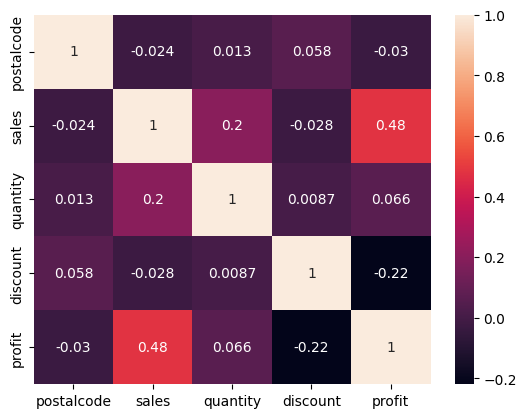

In [216]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

conclusion:
1. heatmap is used to find the relationship between the numerical features.As from the above, all values that are positive/negative describes the direction.
2. as strength is subjective in correlation,all the values between 0.8-1 describes the relashionship as strong.
3. if the value is 1,then relationship is perfect,0.5-0.8 means moderate and below 0.5 means weak/no relationship.
4. From the heatmap, the dark color always represents the weak relationship.
5. the light color represents the perfect relationship.